In [85]:
import torch
import torchvision

print(torch.__version__)

print(torchvision.__version__)

2.1.2
0.16.2


In [86]:
# data loading
from torchvision.datasets import CIFAR10

train_data = CIFAR10(
    root="../data/CIFAR10/train",
    train=True,
    download=True
)

Files already downloaded and verified


In [87]:
print(train_data)

print(len(train_data))

print(train_data.data.shape)

print(train_data.targets)

print(train_data.classes)

print(train_data.class_to_idx)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/CIFAR10/train
    Split: Train
50000
(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7

In [88]:
print(type(train_data[0]))

print(len(train_data[0]))

data, label = train_data[0]

<class 'tuple'>
2


In [89]:
print(type(data))

print(data)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=32x32 at 0x7F1F2DDB6170>


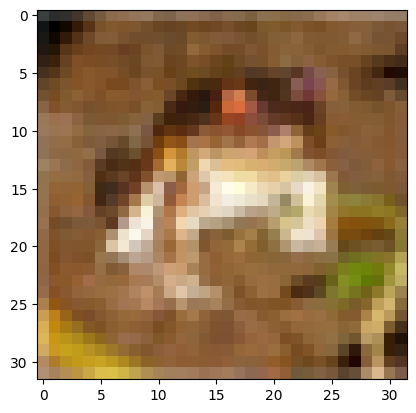

In [90]:
import matplotlib.pyplot as plt

plt.imshow(data)
plt.show()

In [91]:
print(type(label))

print(label)

print(train_data.classes[label])

<class 'int'>
6
frog


In [92]:
test_data = CIFAR10(
    root="../data/CIFAR10/test",
    train=False,
    download=True
)

print(test_data)

print(len(test_data))

print(test_data.data.shape)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/CIFAR10/test
    Split: Test
10000
(10000, 32, 32, 3)


In [93]:
# data transforms
from torchvision import transforms

train_tranforms = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_data = CIFAR10(
    root="../data/CIFAR10/train",
    train=True,
    download=True,
    transform=train_tranforms
)

Files already downloaded and verified


In [94]:
print(train_data)

print(train_data.transforms)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/CIFAR10/train
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [95]:
data, label = train_data[0]

print(type(data))

print(data.size())

print(data)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ...,  0.7307,  0.8276,  0.6531],
         ...,
         [-2.4291, -2.4291, -2.4291,  ...,  0.4593,  0.2267,  0.3430],
         [-2.4291, -2.4291, -2.4291,  ...,  0.4205,  0.0328, -0.2192],
         [-2.4291, -2.4291, -2.4291,  ...,  0.1879, -0.6844, -1.4598]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ...,  0.1581,  0.2564,  0.1188],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -0.2746, -0.4319, -0.3139],
         [-2.4183, -2.4183, -2.4183,  ..., -0.2156, -0.4319, -0.7072],
         [-2.4183, -2.4183, -2.4183,  ..., -0.3926, -1.0612, -1.9463]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


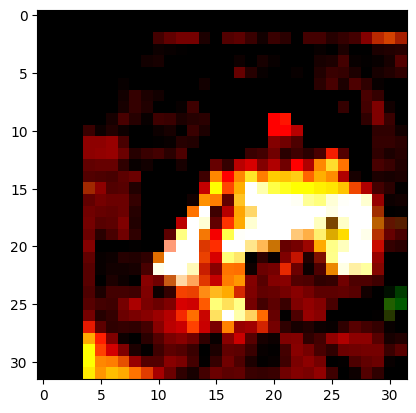

In [96]:
plt.imshow(data.permute(1, 2, 0))

In [97]:
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_data = CIFAR10(
    root="../data/CIFAR10/test",
    train=False,
    download=True,
    transform=test_transforms
)

print(test_data)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/CIFAR10/test
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [98]:
# batching
trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size=32,
    shuffle=True
)

In [99]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())

print(labels_batch.size())

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [123]:
testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=16,
    shuffle=False
)

In [101]:
# model design

# existing, pre-trained models
from torchvision import models

vgg16 = models.vgg16(pretrained=True)

/home/schecter/miniconda3/envs/pikachu/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/schecter/miniconda3/envs/pikachu/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [102]:
print(vgg16.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [103]:
waveglow = torch.hub.load(
    'nvidia/DeepLearningExamples:torchhub',
    'nvidia_waveglow'
)

Using cache found in /home/schecter/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub
/home/schecter/miniconda3/envs/pikachu/lib/python3.10/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [104]:
torch.hub.list('nvidia/DeepLearningExamples:torchhub')

Using cache found in /home/schecter/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


['nvidia_convnets_processing_utils',
 'nvidia_efficientnet',
 'nvidia_efficientnet_b0',
 'nvidia_efficientnet_b4',
 'nvidia_efficientnet_widese_b0',
 'nvidia_efficientnet_widese_b4',
 'nvidia_fastpitch',
 'nvidia_gpunet',
 'nvidia_hifigan',
 'nvidia_resneXt',
 'nvidia_resnet50',
 'nvidia_resnext101_32x4d',
 'nvidia_se_resnext101_32x4d',
 'nvidia_ssd',
 'nvidia_ssd_processing_utils',
 'nvidia_tacotron2',
 'nvidia_textprocessing_utils',
 'nvidia_tft',
 'nvidia_tft_data_utils',
 'nvidia_tts_utils',
 'nvidia_waveglow']

In [105]:
# nn module
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2048, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = x.view(-1, 2048)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [106]:
simplenet = SimpleNN()
print(simplenet)

SimpleNN(
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
)


In [107]:
input = torch.rand(2048)
output = simplenet(input)

In [108]:
output.size() # number of examples, number of classes

torch.Size([1, 2])

In [109]:
# training
class LeNet5(nn.Module):
    
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # x = x.view(-1, int(x.nelement() / x.size(0)))
        x = x.flatten(start_dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [110]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device)

In [111]:
# training loop
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(),
    lr=1e-3,
    momentum=0.9
)

In [112]:
from tqdm import tqdm

epochs = 10

for epoch in range(epochs):

    epoch_loss = 0.0
    loop = tqdm(enumerate(trainloader), total=len(trainloader), leave=False)

    for idx, (inputs, labels) in loop:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        loop.set_description(f"Epoch [{epoch+1}/{epochs}]")
        loop.set_postfix(loss=loss.item())
        
    print(f"Epoch: {epoch+1}, Loss: {epoch_loss/len(trainloader)}")

Epoch: 1, Loss: 2.093929790565774


Epoch: 2, Loss: 1.7514023172191833


Epoch: 3, Loss: 1.6009508441521125


Epoch: 4, Loss: 1.5085161966691776


Epoch: 5, Loss: 1.4380749024341142


Epoch: 6, Loss: 1.3855642037596065


Epoch: 7, Loss: 1.346873929770574


Epoch: 8, Loss: 1.3089489348790466


Epoch: 9, Loss: 1.2751858413638935


Epoch: 10, Loss: 1.2422711247827332


In [113]:
# validation and testing
from torch.utils.data import random_split

train_set, val_set = random_split(
    train_data,
    [40000, 10000]
)

trainloader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True
)

valloader = torch.utils.data.DataLoader(
    val_set,
    batch_size=16,
    shuffle=False
)

In [114]:
print(len(trainloader))
print(len(valloader))

2500
625


In [124]:
# training loop with validation
from torch import optim
from torch import nn

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=1e-3,
)

In [125]:
epochs = 10

for epoch in range(epochs):
    
        # training
    train_loss = 0.0
    model.train()

    loop_train = tqdm(enumerate(trainloader), total=len(trainloader))
    for idx, (inputs, labels) in loop_train:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        loop_train.set_description(f"Epoch [{epoch+1}/{epochs}]")
        loop_train.set_postfix(loss=loss.item())
    
    # validation
    val_loss = 0.0
    model.eval()
    
    loop_val = tqdm(enumerate(valloader), total=len(valloader), leave=False)
    for idx, (inputs, labels) in loop_val:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        loop_val.set_description(f"Epoch [{epoch+1}/{epochs}]")
        loop_val.set_postfix(loss=loss.item())

Epoch [10/10]: 100%|██████████| 2500/2500 [00:15<00:00, 157.12it/s, loss=1.46] 


In [117]:
# testing loop
correct = 0.0
for inputs, labels in testloader:
    model.eval()
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    correct += (predicted == labels).float().sum()

accuracy = correct / (len(test_data) * testloader.batch_size)

print(len(testloader), testloader.batch_size)
print(f"Test accuracy: {accuracy.item()}")

313 32
Test accuracy: 0.019331250339746475


In [118]:
# deply model
# save model
torch.save(model.state_dict(), "../models/lenet5_cifar10.pth")

In [119]:
model = LeNet5().to(device)
model.load_state_dict(torch.load("../models/lenet5_cifar10.pth"))

<All keys matched successfully>